# Autoproductie

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

## Overzicht
We kijken naar de dataset `cars.csv`, deze bevat informatie over de verkoop van 2e hands Volvo’s. We hebben hier een aantal vragen over, beantwoord deze vragen door een beetje code te schrijven en de antwoorden op te schrijven in een Jupyter Notebook.

In [2]:
df_cars = pd.read_csv('../data/input/cars.csv')

In [3]:
df_cars.sample(5)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
674026,Toyota,Highlander Platinum,2022,4257.0,3.5L V6 24V PDI DOHC,8-Speed Automatic,All-wheel Drive,Gasoline,20-27,White,Black,0.0,1.0,0.0,CarMax Puyallup - Offering Express Pickup and ...,NaN,4.2,24.0,1000.0,52998.0
654799,Subaru,Outback Limited,2021,13481.0,2.5L H4 16V GDI DOHC,Automatic CVT,All-wheel Drive,Gasoline,26-33,Magnetite Gray Metallic,Black,0.0,1.0,0.0,Mcgrath Evanston Subaru,4.3,4.8,84.0,485.0,31874.0
689013,Toyota,RAV4 Limited,2010,64647.0,2.5L I4 16V MPFI DOHC,4-Speed Automatic,Four-wheel Drive,Gasoline,21-27,Green,Sand Beige,0.0,0.0,1.0,Victory Motors of Colorado,3.2,4.5,149.0,NaN,16999.0
492182,Lincoln,Nautilus Reserve,2020,23827.0,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,All-wheel Drive,Gasoline,20-25,Silver Radiance,Medium Slate,0.0,1.0,1.0,CARite of North Orlando,NaN,4.8,40.0,401.0,37579.0
247354,Ford,Ranger Lariat,2019,13788.0,2.3L I4 16V GDI DOHC Turbo,10-Speed Automatic,Four-wheel Drive,Gasoline,20-24,Lightning Blue Metallic,Ebony,0.0,1.0,0.0,Mike Burkart Ford,NaN,4.4,239.0,321.0,38995.0


In [4]:
df_cars.describe()

,year,mileage,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price_drop,price
count,762091.000000,7.615850e+05,737879.000000,730608.000000,737239.000000,548118.000000,730459.000000,762091.000000,410112.000000,7.620910e+05
mean,2017.791398,5.578169e+04,0.228616,0.561969,0.657212,4.158568,4.623523,89.550900,1007.467068,3.648898e+04
std,5.110532,4.355788e+04,0.419942,0.496145,0.474642,0.805741,0.276902,115.082266,1375.122208,1.984183e+06
min,1915.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,100.000000,1.000000e+00
25%,2016.000000,2.328700e+04,0.000000,0.000000,0.000000,3.800000,4.500000,14.000000,380.000000,1.958300e+04
50%,2019.000000,4.559600e+04,0.000000,1.000000,1.000000,4.500000,4.700000,51.000000,642.000000,2.798900e+04
75%,2021.000000,7.836500e+04,0.000000,1.000000,1.000000,4.700000,4.800000,119.000000,1007.000000,3.948800e+04
max,2024.000000,1.119067e+06,1.000000,1.000000,1.000000,5.000000,5.000000,1025.000000,170995.000000,1.000000e+09


### Vraag 1:
Wat voor soort data zijn `year`, `fuel_type` en `seller_rating`? Motiveer je antwoord.

> - 'year' is a 64-bit signed integer
> - 'fuel_type' is an object (text data type is known as a string in Python, or object in pandas)
> - 'seller_rating' is a floating-point number format, occupying 64 bits in computer memory

In [5]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762091 entries, 0 to 762090
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   manufacturer         762091 non-null  object 
 1   model                762091 non-null  object 
 2   year                 762091 non-null  int64  
 3   mileage              761585 non-null  float64
 4   engine               747041 non-null  object 
 5   transmission         752187 non-null  object 
 6   drivetrain           740529 non-null  object 
 7   fuel_type            739164 non-null  object 
 8   mpg                  620020 non-null  object 
 9   exterior_color       753232 non-null  object 
 10  interior_color       705116 non-null  object 
 11  accidents_or_damage  737879 non-null  float64
 12  one_owner            730608 non-null  float64
 13  personal_use_only    737239 non-null  float64
 14  seller_name          753498 non-null  object 
 15  seller_rating    

### Vraag 2:
Ik vraag me af hoe een gewoonlijke (mbt prijs) $2^e$ hands Volvo eruit ziet. Kan je deze zoeken en tonen?

In [6]:
Volvo_2 = (df_cars.groupby(['manufacturer'])
                    .get_group(('Volvo',)))
Volvo_2['price'].median()

36673.0

### Vraag 3:
We kunnen de verdeling van de prijs van $2^e$ hands Volvo's voorstellen met een histogram:
![alt text](image.png)
 - Waar zou je verwachten dat het gemiddelde +/- ligt voor deze verdeling?
 - Waar zou je verwachten dat de mediaan +/- ligt?

Teken dit histogram met `.hist` en gebruik `.axvline` om de mediaan en het gemiddelde toe te voegen aan de plot. Komt dit overeen met je verwachting?

 - Kan je de emprisiche cummulatieve distributie functie tekenen voor de verdeling die overeenkomt met dit histogram (zie ook `scipy.stats.ecdf`).

> Gemiddelde en mediaan zullen niet ver van elkaar verwijderd zijn. Op het eerste zicht lijkt het een scheve verdeling naar rechts (mediaan < gemiddelde), maar de waarden tussen 0 en 20000 halen dat gemiddelde omlaag.

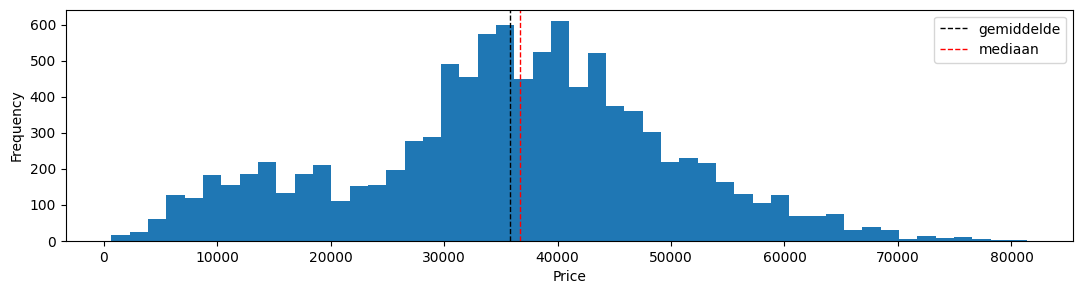

In [7]:
fig = plt.figure(figsize = (13,3))
ax = plt.subplot()

plt.xlabel('Price')
plt.ylabel('Frequency')

plt.axvline(Volvo_2['price'].mean(), color = 'k', linestyle = 'dashed', linewidth = 1, label = 'gemiddelde')
plt.axvline(Volvo_2['price'].median(), color = 'r', linestyle = 'dashed', linewidth = 1, label = 'mediaan')
plt.legend()

Volvo_2['price'].hist(bins = 50, grid = False, ax = ax, range = (Volvo_2['price'].min(), Volvo_2['price'].max()));

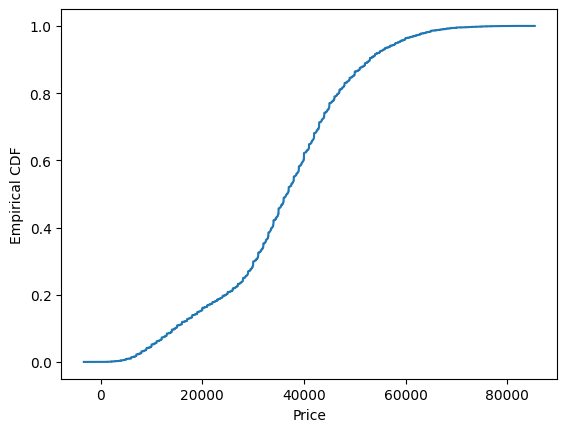

In [8]:
res = stats.ecdf(Volvo_2['price'])
ax = plt.subplot()
res.cdf.plot(ax)
ax.set_xlabel('Price')
ax.set_ylabel('Empirical CDF')
plt.show()

### Vraag 4:
Ik wil nu de verschillende fuel types vergelijken hoeveel deze kosten. Hiervoor maak ik volgende afbeelding met meerdere histogrammen hoe kunnen we deze beter maken? Welke alternatieven zijn er nog?
![alt text](image-1.png)

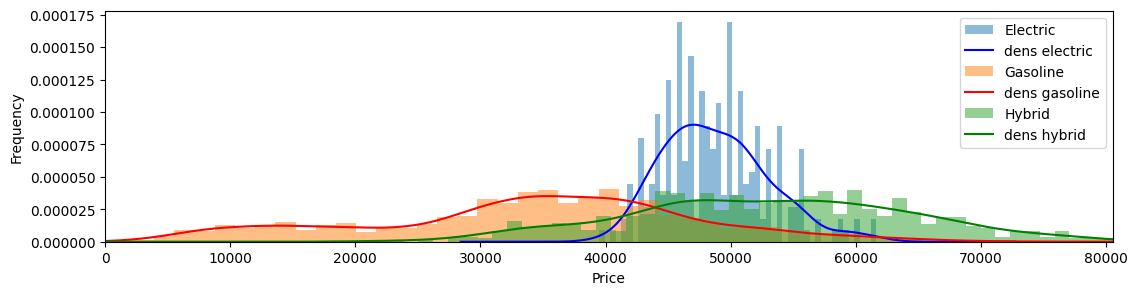

In [9]:
Electric = Volvo_2.loc[Volvo_2['fuel_type'] == 'Electric', 'price']
Gasoline = Volvo_2.loc[Volvo_2['fuel_type'] == 'Gasoline', 'price']
Hybrid = Volvo_2.loc[Volvo_2['fuel_type'] == 'Hybrid', 'price']

fig = plt.figure(figsize = (13,3))
ax = plt.subplot()

plt.hist(Electric, density = True, bins = 50, alpha=0.5, label='Electric')
Electric.plot.kde(color = 'b', label = 'dens electric')
plt.hist(Gasoline, density = True, bins = 50, alpha=0.5, label='Gasoline')
Gasoline.plot.kde(color = 'r', label = 'dens gasoline')
plt.hist(Hybrid, density = True, bins = 50, alpha=0.5, label='Hybrid')
Hybrid.plot.kde(color = 'g', label = 'dens hybrid')

plt.xlim(0, 80500)
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.legend()
plt.show()

C:\Users\u0103525\AppData\Local\Temp\ipykernel_25080\2127360159.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  Volvo_2.hist(['price'], by = 'fuel_type', bins = 50, grid = False, ax = ax, range = (Volvo_2['price'].min(), Volvo_2['price'].max()));


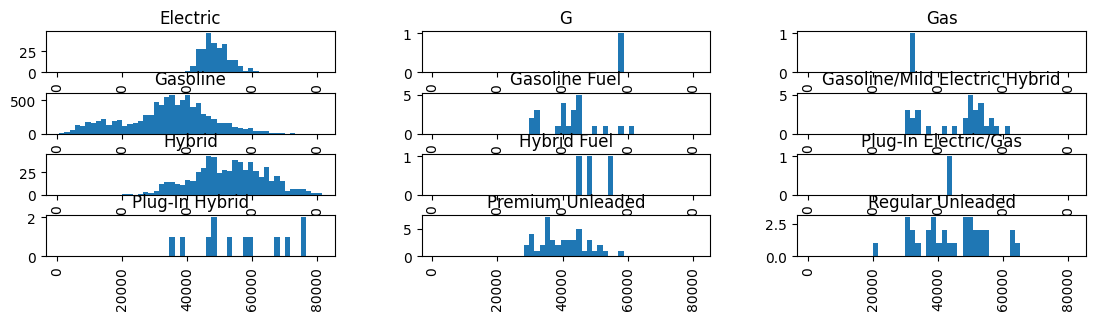

In [10]:
fig = plt.figure(figsize = (13,3))
ax = plt.subplot()

plt.xlabel('Price')
plt.ylabel('Frequency')

Volvo_2.hist(['price'], by = 'fuel_type', bins = 50, grid = False, ax = ax, range = (Volvo_2['price'].min(), Volvo_2['price'].max()));

### Vraag 5:
Gegeven volgende boxplots van de prijs van elektrische & benzine wagens, zijn volgende uitspraken waar/onwaar/niet te besluiten & leg uit:

![alt text](image-2.png)

 - De spreiding op de prijs van elektrische wagens is groter dan die van benzinewagens.

 - Een wagen die meer dan 50 000 euro kost heeft een grotere kans om elektrisch te zijn dan benzine.

 - Een elektrische wagen heeft een grotere kans om meer dan 50 000 euro te kosten dan een benzine wagen.

> - Onwaar, de spreiding van de prijs van elektrische wagens is kleiner dan die van benzinewagens. Er zijn verschillende maten om de spreiding aan te geven, de eenvoudigste is het verschil tussen de minimum en maximum waarde. Ook de IQR is een spreidingsmaat. Beide afstanden zijn kleiner bij de elektische wagens.
> - Niet te besluiten, een boxplot geeft enkel basic info over de spreiding van de data, de mediaan en outliers. Er is geen info over de verdeling of het aantal datapunten.
> - Waar, tussen 25 en 50% van de elektrische wagens kost meer dan 50 000 euro. Minder dan 25% van de benzine wagens kost meer dan 50 000 euro.

### Vraag 6:
Maak een visualizatie om het verband tussen mileage & price te tonen?

<Axes: xlabel='mileage', ylabel='price'>

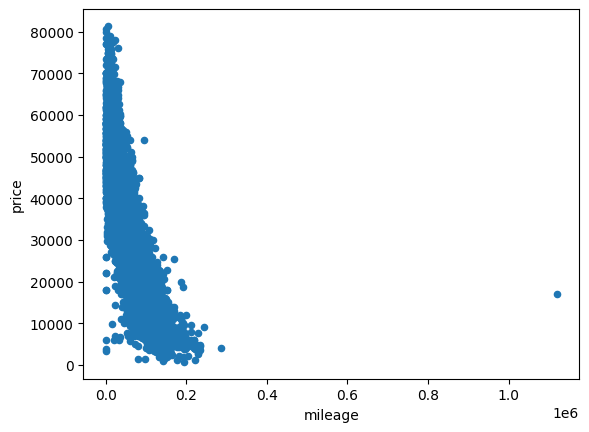

In [11]:
Volvo_2.plot.scatter(x = 'mileage', y = 'price')

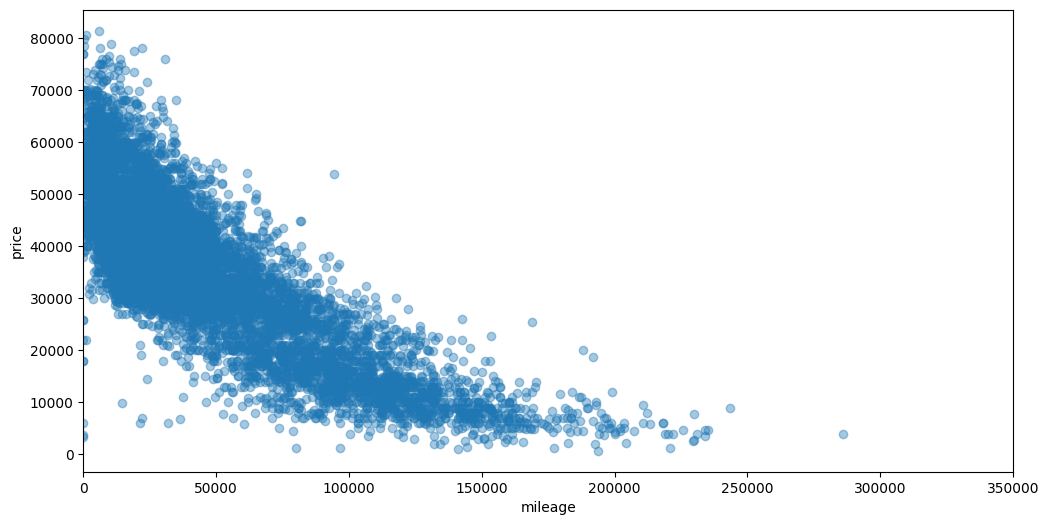

In [12]:
fig = plt.figure(figsize = (12,6))
ax = plt.subplot()

plt.xlim(0, 350000)
plt.xlabel('mileage')
plt.ylabel('price')
plt.scatter(x = Volvo_2['mileage'], y = Volvo_2['price'], alpha = 0.4)
plt.show()

In [13]:
df = Volvo_2[['mileage', 'price'] ]
print(df.corr())

          mileage     price
mileage  1.000000 -0.778414
price   -0.778414  1.000000


### Vraag 7:
Volgens deze data is de gemiddelde prijs van $2^e$ hands elektrische Volvo’s 48 000 euro; als we veronderstellen dat onze dataset representatief is voor alle 2de hands volvo’s, hoe kan je de accuraatheid van deze schatting nagaan?

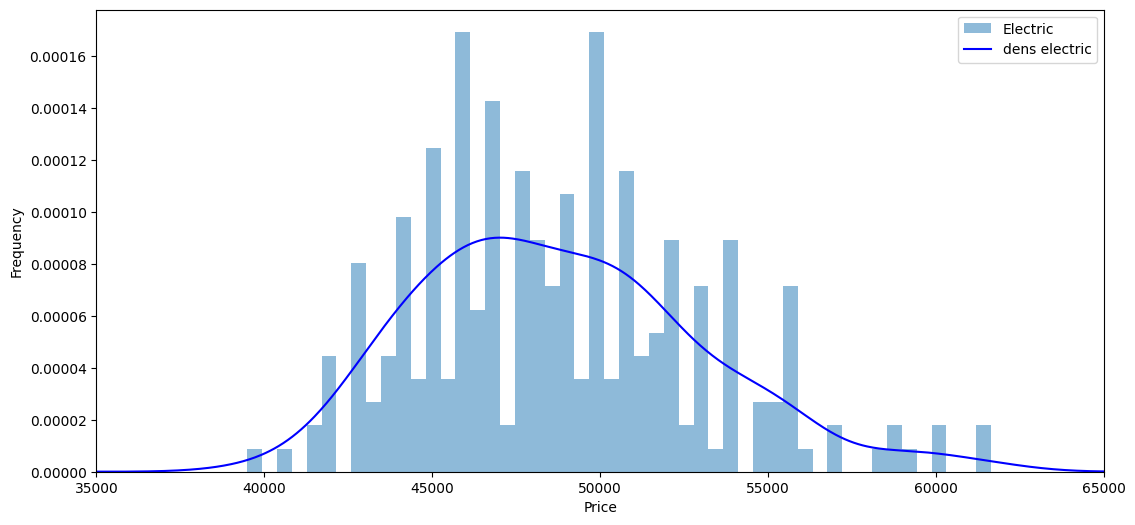

In [14]:
fig = plt.figure(figsize = (13,6))
ax = plt.subplot()

plt.hist(Electric, density = True, bins = 50, alpha=0.5, label='Electric')
Electric.plot.kde(color = 'b', label = 'dens electric')

plt.xlim(35000, 65000)
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.legend()
plt.show()

> **sample mean vs populatie mean -> CLT**
>
> het sample gemiddelde 48788 euro valt midden in de 95% confidence interval van het populatie gemiddelde (47796, 49780)

48788.391304347824
[47796.03320021 49780.74940848]


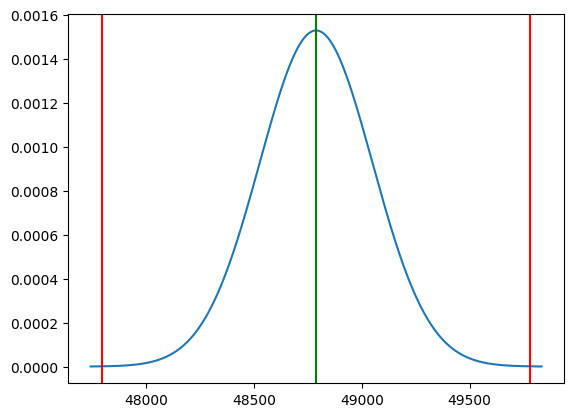

In [15]:
avg = np.mean(Electric)
print(avg)
var = (np.std(Electric)/np.sqrt(Electric.count())) ** 2
sigma = np.sqrt(var)

# Compute the pdf of the normal distribution
x = np.linspace(avg - 4*sigma, avg + 4*sigma, 1000)
y = norm.pdf(x, avg, sigma)

# Confidence interval
certainty = 0.95
confidence_intervals = np.quantile(x, [(1 - certainty) / 2, certainty + (1 - certainty) / 2])
print(confidence_intervals)

# Plot the pdf
plt.plot(x, y);
plt.axvline(x = confidence_intervals[0], color = 'r')
plt.axvline(x = confidence_intervals[1], color = 'r')
plt.axvline(x = avg, color = 'g');